In [66]:
import pandas as pd
import datetime
import re
from time import mktime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data_file = pd.read_csv('main_task.xls')
cui = pd.read_csv('main_task.xls')
data_test = pd.read_csv('kaggle_task.csv')

In [67]:
data_file['Price Range'].value_counts()

$$ - $$$    18412
$            6279
$$$$         1423
Name: Price Range, dtype: int64

In [68]:
len(data_file['City'].value_counts())

31

In [ ]:
for x in (data_file['City'].value_counts())[0:10].index:
    data_file['Ranking'][data_file['City'] == x].hist(bins=100)
plt.show()

Распределение примерно нормальное, из-за разницы в городах имеется уменьшение диаграмм(смещение влево)

Сгенерируем значения дат рецензий и разнице во времени между ними

In [59]:
pattern = re.compile("\d+\/\d+\/\d+")
df = data_file.copy()
df['Reviews'] = df['Reviews'].fillna('None')
df['date_rev'] = df['Reviews'].apply(pattern.findall)
df['date_rev'] = df['date_rev'].apply(
    lambda x: [x[-2], x[-1]] if len(x) >= 3 else x)
df['rev_1'] = df['date_rev'].apply(lambda x: x[0] if len(x) >= 1 else None)
df['rev_2'] = df['date_rev'].apply(lambda x: x[1] if len(x) == 2 else None)
df['rev_1'] = pd.to_datetime(df['rev_1'])
df['rev_2'] = pd.to_datetime(df['rev_2'])
print('Самая свежая дата', df[['rev_1', 'rev_2']].max().max())
print('Самая ранняя дата', df[['rev_1', 'rev_2']].min().min())
max_days = abs(df['rev_1'] - df['rev_2']).max()
print('Количество дней', max_days)

Самая свежая дата 2018-02-26 00:00:00
Самая ранняя дата 2004-04-21 00:00:00
Количество дней 3207 days 00:00:00


City

Разобьем Cities на dummies

In [61]:
data_file = pd.get_dummies(
    data_file, columns=['City'], prefix='', prefix_sep='')

Ценовая категория

Сделаем Ценовую категорию числовым признаком

In [62]:
def price(x):
    if x == '$$ - $$$':
        x = 2
    elif x == '$':
        x = 1
    else:
        x = 3
    return x


data_file['Price Range'] = data_file['Price Range'].apply(price)

Reviews

Так как алгоритм может работать только с числами, а даты добавления отзывов - даты, то поменям их на числа

In [64]:
data_file['days'] = abs(df['rev_1'] - df['rev_2']).dt.days
data_file['days'].fillna(data_file['days'].mean(), inplace=True)
df['rev_1'].fillna(df['rev_1'].mean(), inplace=True)
df['rev_1'] = df['rev_1'].apply(lambda x: mktime(x.timetuple()))
df['rev_2'].fillna(df['rev_2'].mean(), inplace=True)
df['rev_2'] = df['rev_2'].apply(lambda x: mktime(x.timetuple()))
data_file['rev_1'] = df['rev_1']
data_file['rev_2'] = df['rev_2']

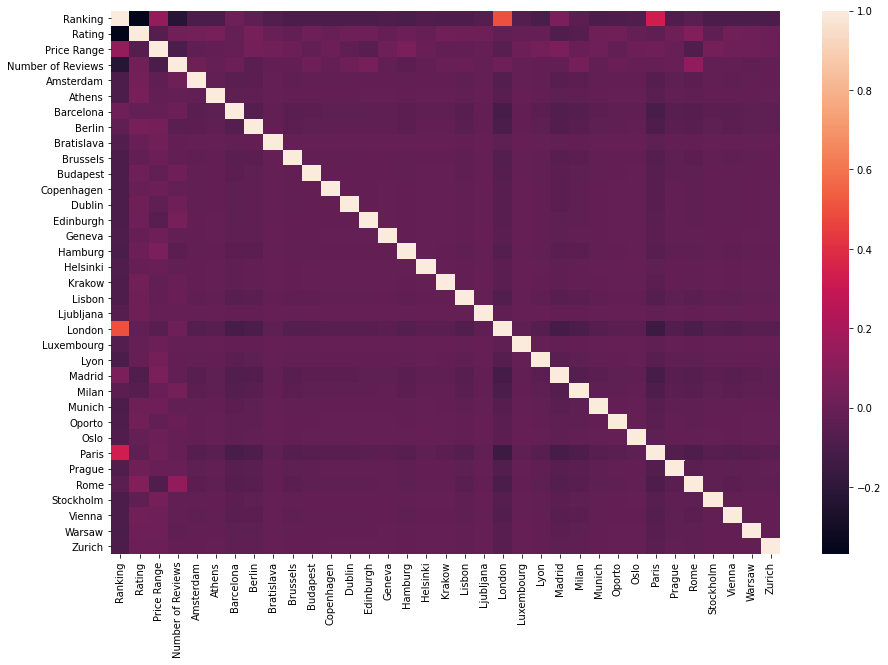

In [63]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(data_file.corr(),)

Корреляционная матрица признаков, достаточно большое значение имеет days

In [65]:
data_file.drop(['Restaurant_id', 'Reviews', 'URL_TA', 'ID_TA',
                'Cuisine Style'], axis=1, inplace=True)
data_file['Ranking'].fillna(data_file['Ranking'].mean(), inplace=True)
data_file['Rating'].fillna(data_file['Rating'].mean(), inplace=True)
data_file['Number of Reviews'].fillna(
    data_file['Number of Reviews'].mean(), inplace=True)
X = data_file.drop(['Rating'], axis=1)

In [36]:
RANDOM_SEED = 42

In [37]:
data_file

,Ranking,Rating,Price Range,Number of Reviews,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,...,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,days,rev_1,rev_2
0,5570.0,3.5,2,194.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,41.00000,1.514668e+09,1.511125e+09
1,1537.0,4.0,3,10.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,382.00000,1.499288e+09,1.466284e+09
2,353.0,4.5,3,688.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.00000,1.515359e+09,1.515186e+09
3,3458.0,5.0,3,3.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,141.71218,1.493933e+09,1.487949e+09
4,621.0,4.0,2,84.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,272.00000,1.510952e+09,1.487452e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,500.0,4.5,2,79.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,34.00000,1.513372e+09,1.510434e+09
39996,6341.0,3.5,2,542.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,9.00000,1.513804e+09,1.513026e+09
39997,1652.0,4.5,3,4.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,3127.00000,1.478120e+09,1.207948e+09
39998,641.0,4.0,2,70.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,23.00000,1.499720e+09,1.497733e+09


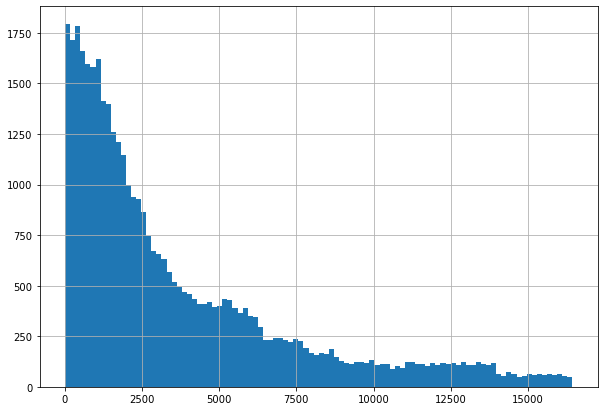

In [38]:
plt.rcParams['figure.figsize'] = (10, 7)
data_file['Ranking'].hist(bins=100)

Обучим модель

In [39]:
from sklearn.model_selection import train_test_split
y = data_file['Rating']
data_file.drop(['Rating'], axis=1, inplace=True)
# Загружаем специальный инструмент для разбивки:

# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED)

In [40]:
# инструмент для создания и обучения модели
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics  # инструменты для оценки точности модели

# Создаём модель
model = RandomForestRegressor(
    n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [41]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.210245625


In [42]:
data_test

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354
...,...,...,...,...,...,...,...,...,...
9995,id_9995,London,"['Caribbean', 'Barbecue', 'Jamaican', 'Vegetar...",4367.0,$,28.0,[['By far best Chicken burgers and wings in L....,/Restaurant_Review-g186338-d11916827-Reviews-C...,d11916827
9996,id_9996,Lisbon,"['Indian', 'Asian', 'Nepali', 'Bangladeshi']",2612.0,$$ - $$$,2.0,"[['Ok indian food'], ['11/25/2017']]",/Restaurant_Review-g189158-d12701633-Reviews-C...,d12701633
9997,id_9997,Milan,NaN,5562.0,NaN,2.0,"[[], []]",/Restaurant_Review-g187849-d13198194-Reviews-Q...,d13198194
9998,id_9998,Milan,['Italian'],4010.0,NaN,2.0,"[[], []]",/Restaurant_Review-g187849-d3862815-Reviews-La...,d3862815


Проделаем предобработку данных для самого задания

In [43]:
data_test = pd.read_csv('kaggle_task.csv')
cui = pd.read_csv('kaggle_task.csv')
df = pd.read_csv('kaggle_task.csv')
data_test = pd.get_dummies(
    data_test, columns=['City'], prefix='', prefix_sep='')
pattern = re.compile("\d+\/\d+\/\d+")
df['Reviews'] = df['Reviews'].fillna('None')
df['date_rev'] = df['Reviews'].apply(pattern.findall)
df['date_rev'] = df['date_rev'].apply(
    lambda x: [x[-2], x[-1]] if len(x) >= 3 else x)
df['rev_1'] = df['date_rev'].apply(lambda x: x[0] if len(x) >= 1 else None)
df['rev_2'] = df['date_rev'].apply(lambda x: x[1] if len(x) == 2 else None)
df['rev_1'] = pd.to_datetime(df['rev_1'])
df['rev_2'] = pd.to_datetime(df['rev_2'])


def price(x):
    if x == '$$ - $$$':
        x = 2
    elif x == '$':
        x = 1
    else:
        x = 3
    return x


data_test['Price Range'] = data_test['Price Range'].apply(price)
data_test['days'] = abs(df['rev_1'] - df['rev_2']).dt.days
data_test['days'].fillna(data_test['days'].mean(), inplace=True)
df['rev_1'].fillna(df['rev_1'].mean(), inplace=True)
df['rev_1'] = df['rev_1'].apply(lambda x: mktime(x.timetuple()))
df['rev_2'].fillna(df['rev_2'].mean(), inplace=True)
df['rev_2'] = df['rev_2'].apply(lambda x: mktime(x.timetuple()))
data_test['rev_1'] = df['rev_1']
data_test['rev_2'] = df['rev_2']
data_test.drop(['Restaurant_id', 'Reviews', 'URL_TA', 'ID_TA',
                'Cuisine Style'], axis=1, inplace=True)
data_test['Ranking'].fillna(data_test['Ranking'].mean(), inplace=True)
data_test['Number of Reviews'].fillna(
    data_test['Number of Reviews'].mean(), inplace=True)

Получим значения Rating от модели

In [44]:
predict_submission = model.predict(data_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [45]:
data_test = pd.read_csv('kaggle_task.csv')

In [46]:
submission = pd.DataFrame()
submission['Restaurant_id'] = data_test['Restaurant_id']
submission['Rating'] = predict_submission

In [47]:
submission

,Restaurant_id,Rating
0,id_0,3.225
1,id_1,4.175
2,id_2,4.515
3,id_3,4.335
4,id_4,4.430
...,...,...
9995,id_9995,4.480
9996,id_9996,4.180
9997,id_9997,3.145
9998,id_9998,4.485


In [48]:
submission.to_csv('submission.csv', index=False)